In [32]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os

curr_dir = os.getcwd()
df = pd.read_excel(curr_dir + '/credit_data origi.xlsx')

In [7]:
df.head(5)

,customer_id,risk level,age,gender,job,housing,saving acc,checking acc,credit amount,duration,loan purpose
0,101,low,67,male,2,own,NaN,small,1169,6,TV
1,102,high,22,female,2,own,small,average,5951,48,TV
2,103,low,49,male,1,own,small,NaN,2096,12,education
3,104,low,45,male,2,no housing,small,small,7882,42,furniture and equipment
4,105,high,53,male,2,no housing,small,small,4870,24,car


In [9]:
def eda(dataframe):
    print("missing values: ", dataframe.isnull().sum())
    print("dataframe index: ", dataframe.index)
    print("dataframe types: ", dataframe.dtypes)
    print("dataframe shape: ", dataframe.shape)
    print("dataframe describe: ", dataframe.describe())
    print("dataframe columns: ", dataframe.columns)
    print("dataframe nunique: ", dataframe.nunique())
eda(df)

missing values:  customer_id        0
risk level         0
age                0
gender             0
job                0
housing            0
saving acc       183
checking acc     394
credit amount      0
duration           0
loan purpose       0
dtype: int64
dataframe index:  RangeIndex(start=0, stop=1000, step=1)
dataframe types:  customer_id       int64
risk level       object
age               int64
gender           object
job               int64
housing          object
saving acc       object
checking acc     object
credit amount     int64
duration          int64
loan purpose     object
dtype: object
dataframe shape:  (1000, 11)
dataframe describe:         customer_id          age          job  credit amount     duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    600.500000    36.097000     1.904000    3271.258000    20.903000
std     288.819436    13.327085     0.653614    2822.736876    12.058814
min     101.000000     5.000000     0.000000

In [33]:
#fill na in saving acc and checking acc with "unknown"
df['saving acc'].fillna('unknown', inplace=True)
df['checking acc'].fillna('unknown', inplace=True)

/var/folders/r7/1j4rdrgx44zfk6phczxmpr3m0000gn/T/ipykernel_18099/2909415429.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['saving acc'].fillna('unknown', inplace=True)
/var/folders/r7/1j4rdrgx44zfk6phczxmpr3m0000gn/T/ipykernel_18099/2909415429.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

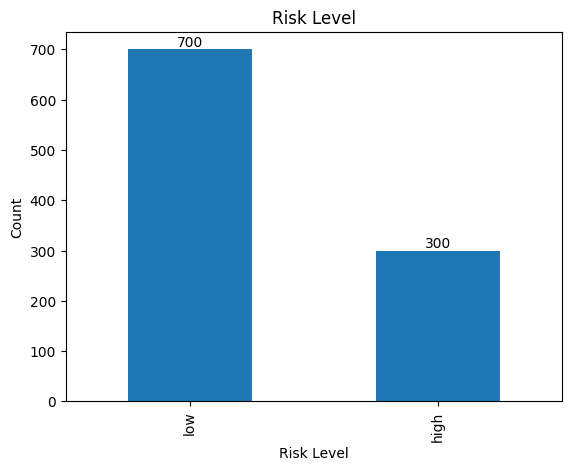

In [16]:
#bar chart percentage of risk level
risk = df['risk level'].value_counts()
risk.plot(kind='bar',stacked=True)
plt.title('Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Count')
for index, value in enumerate(risk):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom')
plt.show()


In [ ]:
#encoding the categorical variables
le = LabelEncoder()
df['e_risk_level'] = le.fit_transform(df['risk level'])
df['e_gender'] = le.fit_transform(df['gender'])
df['e_housing'] = le.fit_transform(df['housing'])
df['e_saving_acc'] = le.fit_transform(df['saving acc'])
df['e_checking_acc'] = le.fit_transform(df['checking acc'])
df['e_loan_purpose'] = le.fit_transform(df['loan purpose'])


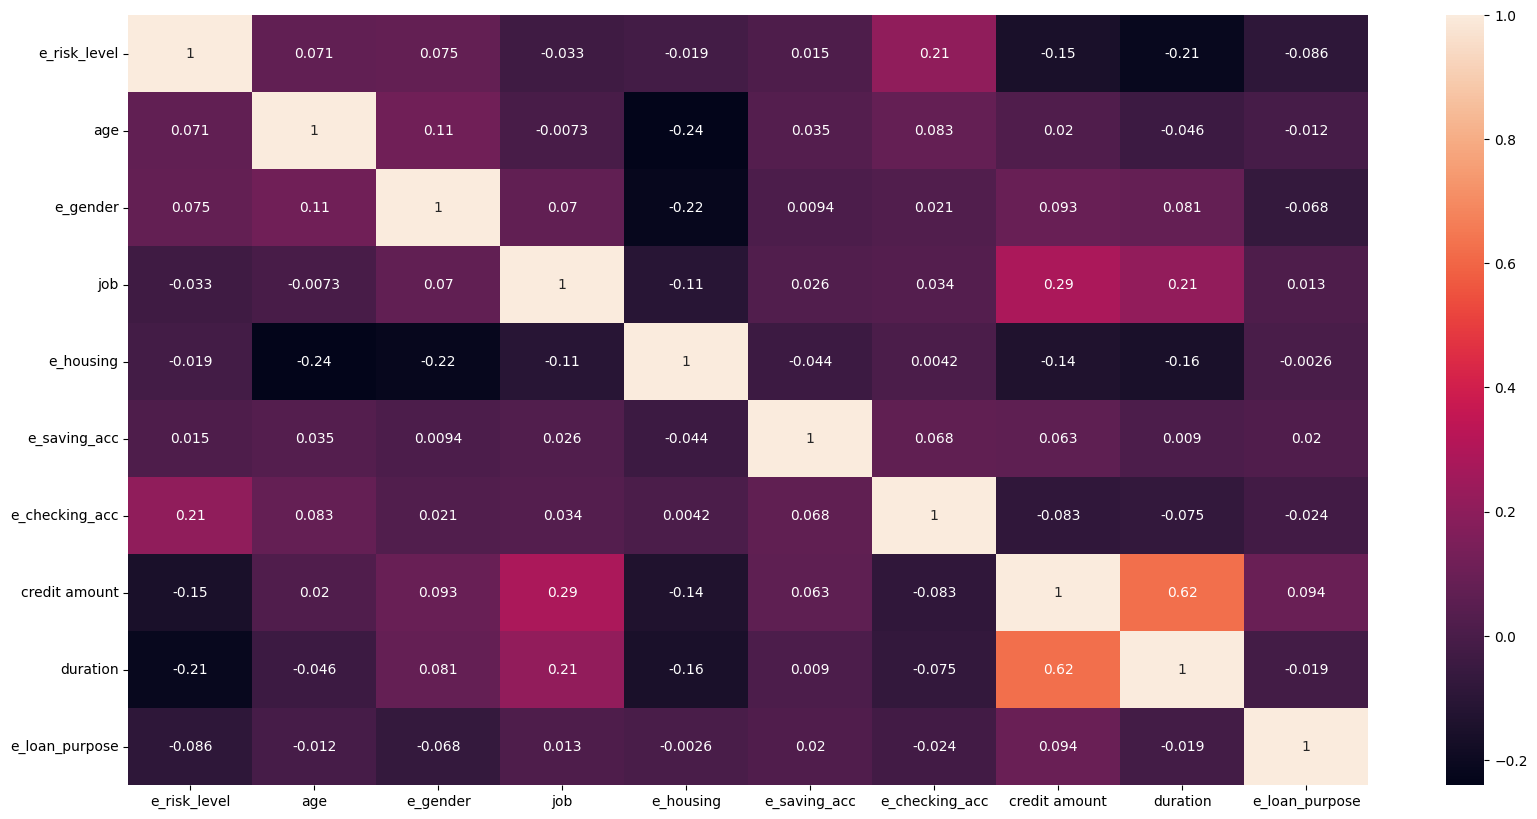

In [36]:
df_num = df[['e_risk_level', 'age', 'e_gender', 'job', 'e_housing', 'e_saving_acc', 'e_checking_acc', 'credit amount', 'duration', 'e_loan_purpose']]

corr = df_num.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.show()

In [37]:
df.head(5)

,customer_id,risk level,age,gender,job,housing,saving acc,checking acc,credit amount,duration,...,e housing,e saving acc,e checking acc,e loan purpose,e_risk_level,e_gender,e_housing,e_saving_acc,e_checking_acc,e_loan_purpose
0,101,low,67,male,2,own,unknown,small,1169,6,...,1,4,2,0,1,1,1,4,2,0
1,102,high,22,female,2,own,small,average,5951,48,...,1,3,0,0,0,0,1,3,0,0
2,103,low,49,male,1,own,small,unknown,2096,12,...,1,3,3,3,1,1,1,3,3,3
3,104,low,45,male,2,no housing,small,small,7882,42,...,0,3,2,4,1,1,0,3,2,4
4,105,high,53,male,2,no housing,small,small,4870,24,...,0,3,2,2,0,1,0,3,2,2


In [ ]:
#break the datasets into two parts: one is low risk and one is high risk
low_risk = df[df['risk level'] == 'low']
high_risk = df[df['risk level'] == 'high']

/var/folders/r7/1j4rdrgx44zfk6phczxmpr3m0000gn/T/ipykernel_18099/861982656.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_risk['age'], color='blue', label='low risk')
/var/folders/r7/1j4rdrgx44zfk6phczxmpr3m0000gn/T/ipykernel_18099/861982656.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

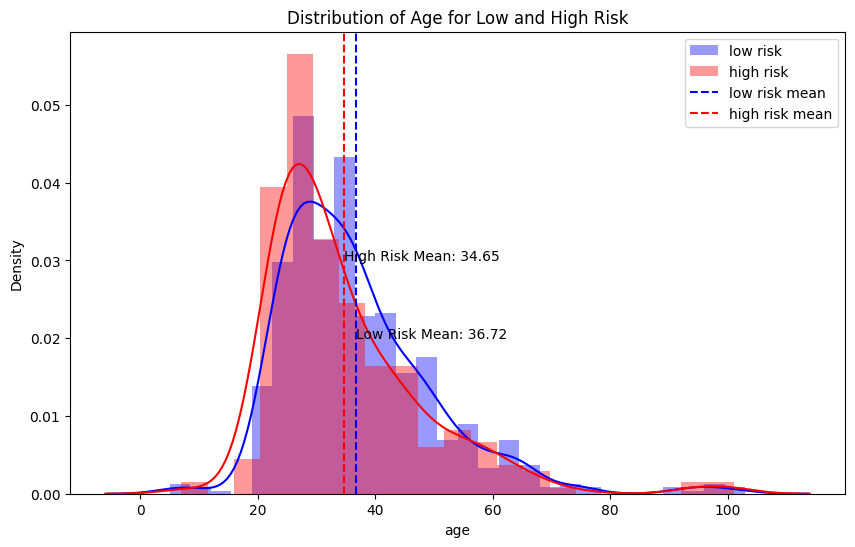

In [27]:
#Distribution of Age for Low and High Risk
plt.figure(figsize=(10,6))
sns.distplot(low_risk['age'], color='blue', label='low risk')
sns.distplot(high_risk['age'], color='red', label='high risk')
plt.axvline(low_risk['age'].mean(), color='blue', linestyle='--', label='low risk mean')
plt.axvline(high_risk['age'].mean(), color='red', linestyle='--', label='high risk mean')
plt.text(low_risk['age'].mean(), 0.02, 'Low Risk Mean: {:.2f}'.format(low_risk['age'].mean()))
plt.text(high_risk['age'].mean(), 0.03, 'High Risk Mean: {:.2f}'.format(high_risk['age'].mean()))
plt.title('Distribution of Age for Low and High Risk')
plt.legend()
plt.show()

In [ ]:
#